In [34]:
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
import regex as re
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.graph_objects as go
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [35]:

df = pd.read_csv("Twitter_Data.csv")

In [36]:
# Label the columns
df.columns = ["tweets","sentiments"]

df

,tweets,sentiments
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
...,...,...
162975,why these 456 crores paid neerav modi not reco...,Negative
162976,dear rss terrorist payal gawar what about modi...,Negative
162977,did you cover her interaction forum where she ...,Neutral
162978,there big project came into india modi dream p...,Neutral


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   tweets      134280 non-null  object
 1   sentiments  134282 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB


In [38]:
# Identify inconsistencies
#The code `duplicate_rows = df[df.duplicated()]` is identifying and storing the duplicate rows in the DataFrame `df`. The `df.duplicated()` function returns a boolean Series indicating whether each row is a duplicate or not. By passing this boolean Series as a filter to the DataFrame `df`, only the duplicate rows are selected and stored in the variable `duplicate_rows`.
duplicate_rows = df[df.duplicated()]
duplicate_rows

,tweets,sentiments
129999,NaN,NaN
130000,NaN,NaN
130001,NaN,NaN
130002,NaN,NaN
130003,NaN,NaN
...,...,...
158691,NaN,NaN
158692,NaN,NaN
158693,NaN,NaN
159443,NaN,Neutral


In [39]:
# Identify missing values
#The code is calculating the number of missing values in each column of the DataFrame `df`. It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

tweets        28700
sentiments    28698
dtype: int64

In [40]:
# removing duplicates

#df.drop_duplicates(inplace = True)

# Remove the duplicate rows
#df = df.drop_duplicates()

df['tweets'] = df['tweets'].astype(str)



stopw = set(stopwords.words("english"))

print(stopw)
df["tweets"] = df['tweets'].apply(lambda x: ' '.join(
    [word.lower() for word in x.split() if word.lower() not in stopw]))


def convert_list_to_str(l):
    st = ""
    for i in l:
        st = st+i+" "
    st = st[:-1]
    return st


tokenizer = RegexpTokenizer(r'\w+|\d+')
df["tweets_new"] = df["tweets"].apply(tokenizer.tokenize)
df["tweets_new"] = df["tweets_new"].apply(convert_list_to_str)


df

{'as', 'i', "hasn't", 'up', 'some', 'when', "aren't", 'do', "hadn't", "shan't", "it's", 'than', 'we', "needn't", "haven't", 'be', 'doing', 'of', 'having', 'not', 'itself', 'so', 'ain', 'but', 'myself', 'am', "you're", 'she', 'yourselves', 'has', 'haven', 'should', 't', 'what', "you'd", 'd', 'he', 'where', 'same', "that'll", 'for', 'how', 'own', 'isn', 'does', 'then', 'now', 'wouldn', 'herself', 'shan', 'between', 'during', 'out', "isn't", 'off', 'yourself', 'no', "you've", 'couldn', 'himself', 'once', 'in', 'have', "should've", 'mustn', 'an', "mightn't", 'you', 'to', 'been', 'him', 'm', 'who', "wouldn't", 'just', 'very', 'is', 'at', 'll', 'above', 'the', 've', 'will', 'theirs', 'his', 'they', 'their', 'or', 'themselves', 'being', 'aren', 'most', 'if', 'there', 'can', 'here', 'this', 'which', 'only', 'them', 'both', 'because', 'below', 'doesn', 'each', "weren't", 'ma', 's', 'needn', 'your', 'shouldn', 'ourselves', 'under', "won't", 'these', 'until', 'why', 'down', 'too', 'through', 'aga

,tweets,sentiments,tweets_new
0,modi promised “minimum government maximum gove...,Negative,modi promised minimum government maximum gover...
1,talk nonsense continue drama vote modi,Neutral,talk nonsense continue drama vote modi
2,say vote modi welcome bjp told rahul main camp...,Positive,say vote modi welcome bjp told rahul main camp...
3,asking supporters prefix chowkidar names modi ...,Positive,asking supporters prefix chowkidar names modi ...
4,answer among powerful world leader today trump...,Positive,answer among powerful world leader today trump...
...,...,...,...
162975,456 crores paid neerav modi recovered congress...,Negative,456 crores paid neerav modi recovered congress...
162976,dear rss terrorist payal gawar modi killing po...,Negative,dear rss terrorist payal gawar modi killing po...
162977,cover interaction forum left,Neutral,cover interaction forum left
162978,big project came india modi dream project happ...,Neutral,big project came india modi dream project happ...


In [41]:
lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if no mapping found


def lemmatize_sentence(sentence):
    # tokenizer = RegexpTokenizer(r'\w+')
    # words = word_tokenize(sentence)
    words = sentence.split()
    pos_tags = nltk.pos_tag(words)
    lemmatizer = WordNetLemmatizer()

    lemmatized_words = [lemmatizer.lemmatize(
        word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    return ' '.join(lemmatized_words)


def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df["tweets_new"] = df["tweets_new"].apply(lemmatize_sentence)
print(df)

df["tweets"] = df["tweets_new"]

# df["tweets"] = df["tweets_new"].apply(convert_list_to_str)
df = df.drop(columns=["tweets_new"])
# print(df)

#fill 0 in mum
df['tweets'] = df['tweets'].fillna(0)

# Save the dataframe
df.to_csv("tweet_clean.csv", index=False)
df

                                                   tweets sentiments  \
0       modi promised “minimum government maximum gove...   Negative   
1                  talk nonsense continue drama vote modi    Neutral   
2       say vote modi welcome bjp told rahul main camp...   Positive   
3       asking supporters prefix chowkidar names modi ...   Positive   
4       answer among powerful world leader today trump...   Positive   
...                                                   ...        ...   
162975  456 crores paid neerav modi recovered congress...   Negative   
162976  dear rss terrorist payal gawar modi killing po...   Negative   
162977                       cover interaction forum left    Neutral   
162978  big project came india modi dream project happ...    Neutral   
162979  ever listen like gurukul discipline maintained...   Positive   

                                               tweets_new  
0       modi promise minimum government maximum govern...  
1              

,tweets,sentiments
0,modi promise minimum government maximum govern...,Negative
1,talk nonsense continue drama vote modi,Neutral
2,say vote modi welcome bjp tell rahul main camp...,Positive
3,ask supporter prefix chowkidar name modi great...,Positive
4,answer among powerful world leader today trump...,Positive
...,...,...
162975,456 crore pay neerav modi recover congress lea...,Negative
162976,dear rss terrorist payal gawar modi kill posit...,Negative
162977,cover interaction forum leave,Neutral
162978,big project come india modi dream project happ...,Neutral


In [42]:
#check for duplicates
df.duplicated().sum()

32615

In [43]:
#check null
df['tweets'].isnull().sum()

0

In [44]:

#`df.describe().T` is transposing the output of the `describe()` method on a DataFrame `df`. The `describe()` method provides summary statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartiles. By applying `.T` after `describe()`, the output is transposed, meaning the rows become columns and vice versa. This can be useful for better readability or for further analysis of the summary statistics.
df.describe().T

,count,unique,top,freq
tweets,162980,130310,nan,28700
sentiments,134282,3,Positive,59652


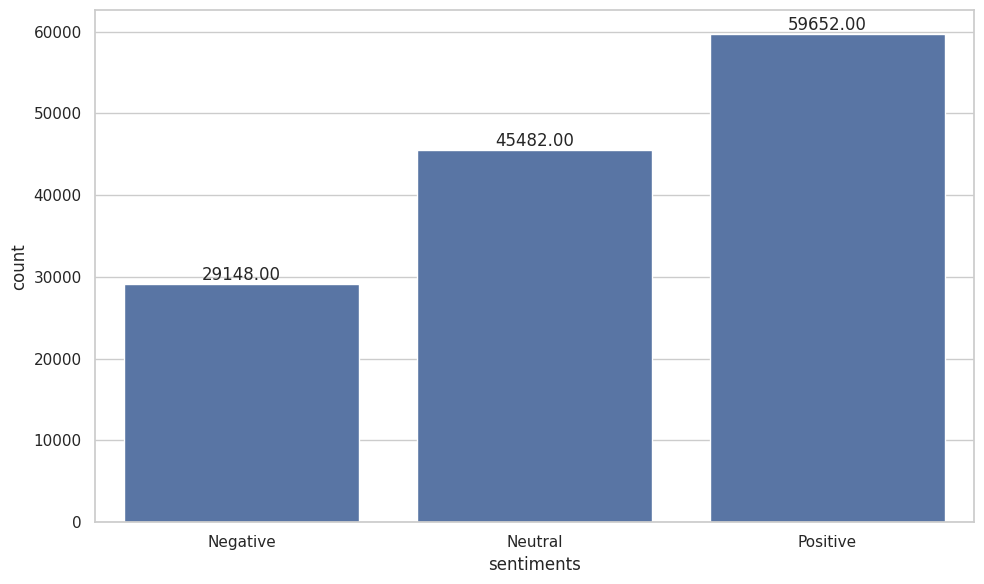

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiments', data=df)
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

In [47]:
df_copy = df.copy()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['sentiments']
df_copy[object_cols] = df_copy[object_cols].astype(str)

df_copy[object_cols] = ordinal_encoder.fit_transform(df_copy[object_cols])

df_copy.head()

ordinal_encoder = OrdinalEncoder()

# Every single column with categorical values will be converted.
object_cols = ['tweets','sentiments']
df[object_cols] = df[object_cols].astype(str)

df[object_cols] = ordinal_encoder.fit_transform(df[object_cols])

df.head()

,tweets,sentiments
0,72185.0,0.0
1,112498.0,1.0
2,102461.0,2.0
3,7527.0,2.0
4,5418.0,2.0


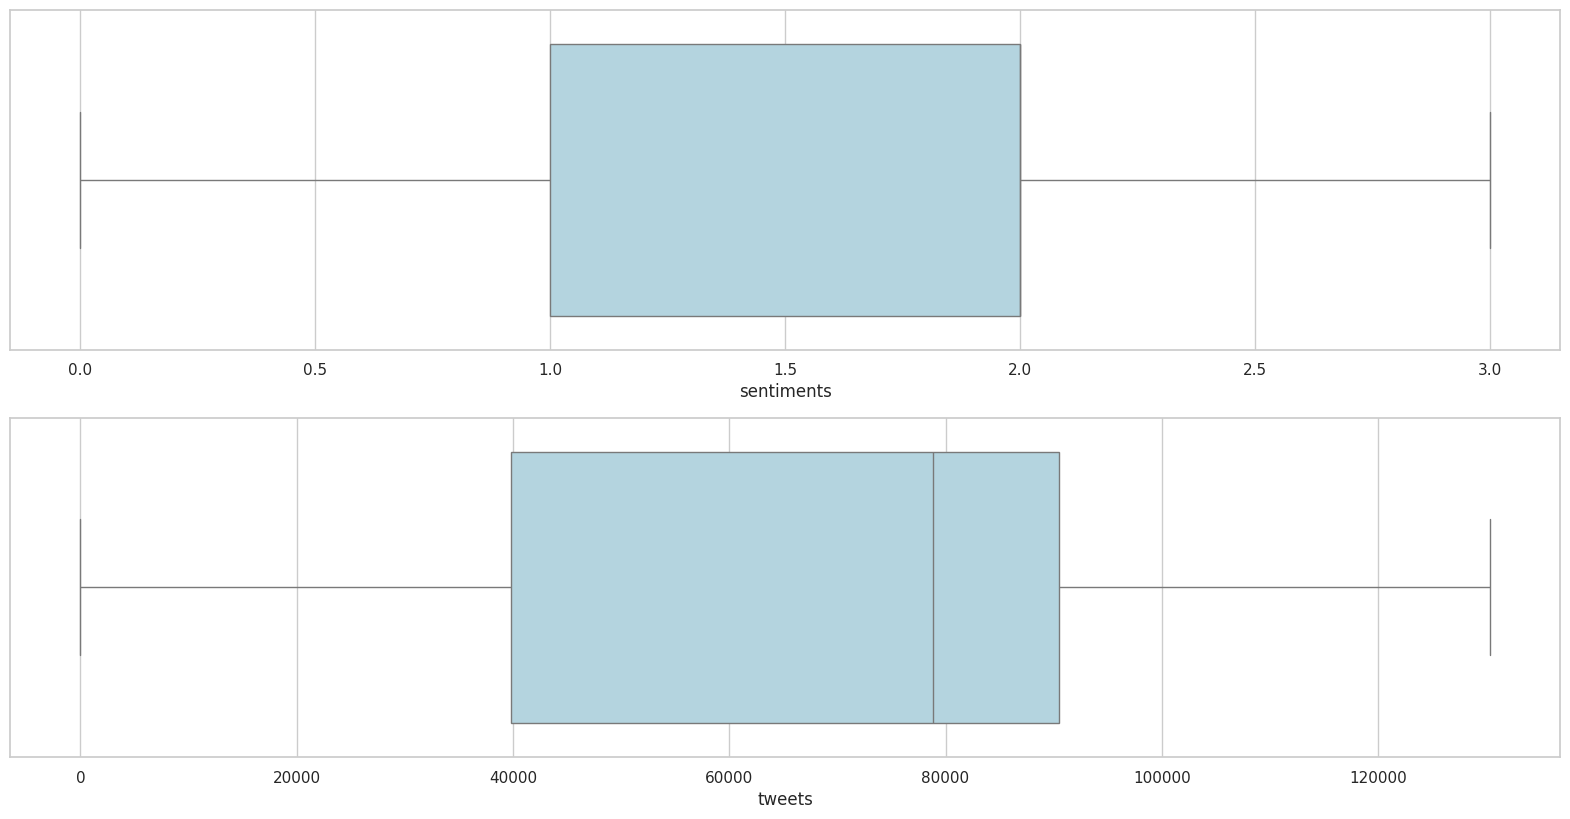

In [49]:
plt.figure(figsize= (20,15))



plt.subplot(3,1,2)
sns.boxplot(x= df['sentiments'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= df['tweets'], color='lightblue')

plt.show()

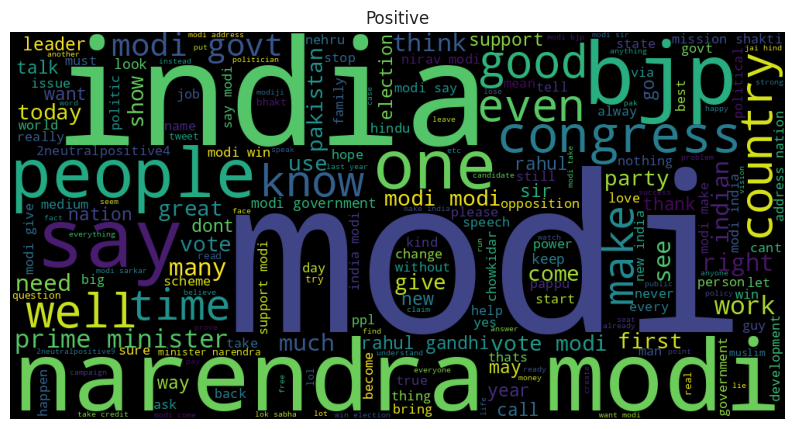

In [50]:
# Load the cleaned data
clean_df = pd.read_csv("tweet_clean.csv")

# Extract the sentiment words
positive_words = clean_df[clean_df['sentiments'] == 'Positive']['tweets'].tolist()
positive_words = [str(word) for word in positive_words]
positive_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(positive_words))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')
plt.show()


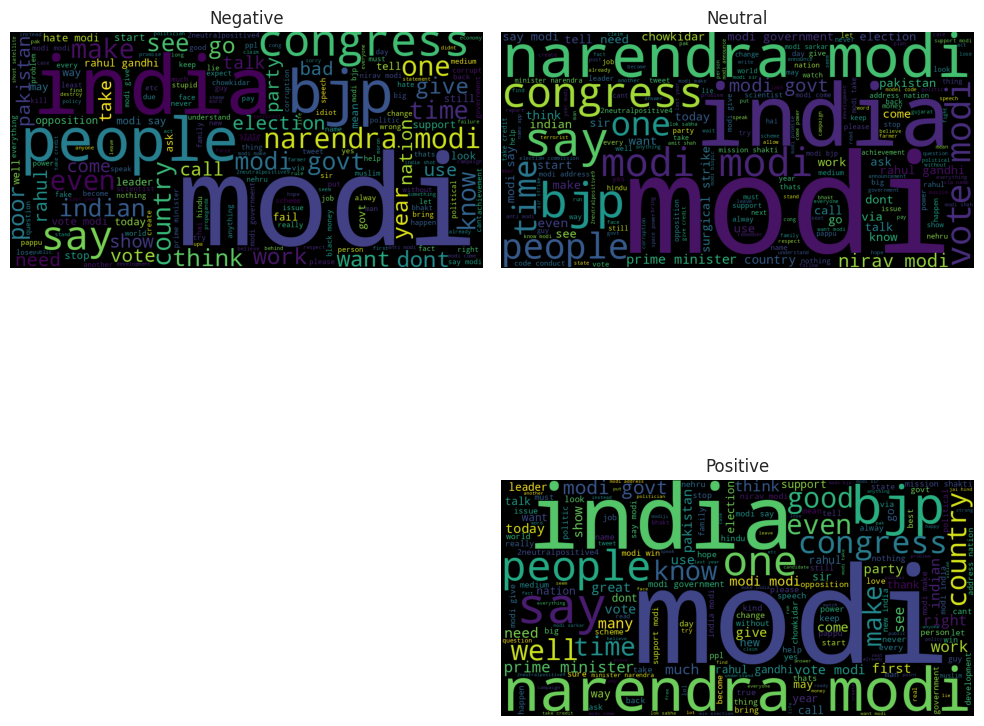

In [51]:
# Extract the sentiment words

negative_words = clean_df[clean_df['sentiments'] == 'Negative']['tweets'].tolist()
neutral_words = clean_df[clean_df['sentiments'] == 'Neutral']['tweets'].tolist()


negative_words = [str(word) for word in negative_words]
neutral_words = [str(word) for word in neutral_words]



negative_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(negative_words))
neutral_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(neutral_words))


# Display the word clouds
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.title('Negative')

plt.subplot(2, 2, 2)
plt.imshow(neutral_wordcloud)
plt.axis('off')
plt.title('Neutral')


plt.subplot(2, 2, 4)
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.title('Positive')

plt.tight_layout()
plt.show()

In [52]:
print(df['sentiments'].nunique())


4


In [53]:
from transformers import BertTokenizer
def data_process(data, labels):
    input_ids = []
    attention_masks = []
    bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    for sentence in data:
        bert_inp = bert_tokenizer.__call__(sentence, max_length=36,
                                           padding='max_length', pad_to_max_length=True,
                                           truncation=True, return_token_type_ids=False)

        input_ids.append(bert_inp['input_ids'])
        attention_masks.append(bert_inp['attention_mask'])
    input_ids = np.asarray(input_ids)
    attention_masks = np.array(attention_masks)
    labels = np.array(labels)
    return input_ids, attention_masks, labels

In [54]:
!pip install transformers

In [55]:
import gc

import torch
from torch import nn
from transformers import BertModel

class BERT_RNN(nn.Module):

    def __init__(self, num_classes, hidden_size, num_layers, bidirectional):
        super(BERT_RNN, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.lstm = nn.LSTM(input_size=768, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, bidirectional=bidirectional)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(hidden_size * 2 if bidirectional else hidden_size, num_classes)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        cls_hs = self.bert(input_ids=sent_id, attention_mask=mask, return_dict=False, output_hidden_states=True)
        x = cls_hs[0]
        x = self.dropout(x)
        lstm_out, _ = self.lstm(x)
        x = self.fc(lstm_out[:, -1, :])
        return self.softmax(x)

In [56]:
# return input_ids, attention_masks, labels
input_ids, attention_masks, labels = data_process(df_copy["tweets"], df_copy["sentiments"])


input_ids.shape

(162980, 36)

In [57]:
dataset = pd.DataFrame({'input_ids': list(input_ids), 'attention_masks': list(attention_masks)}, columns=['input_ids', 'attention_masks'])
dataset

,input_ids,attention_masks
0,"[101, 16913, 2072, 4872, 6263, 2231, 4555, 106...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[101, 2831, 14652, 3613, 3689, 3789, 16913, 20...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
2,"[101, 2360, 3789, 16913, 2072, 6160, 24954, 24...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[101, 3198, 10129, 17576, 20209, 3211, 7662, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[101, 3437, 2426, 3928, 2088, 3003, 2651, 8398...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ..."
...,...,...
162975,"[101, 3429, 2575, 21665, 3477, 7663, 2527, 261...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
162976,"[101, 6203, 12667, 2015, 9452, 3477, 2389, 117...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
162977,"[101, 3104, 8290, 7057, 2681, 102, 0, 0, 0, 0,...","[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
162978,"[101, 2502, 2622, 2272, 2634, 16913, 2072, 395...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ..."


In [58]:
labels = labels.astype(np.int64)
labels

array([0, 1, 2, ..., 1, 1, 2])

In [61]:
import gc
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import AutoModel
import pandas as pd

train_text, temp_text, train_labels, temp_labels = train_test_split(dataset, labels,
                             random_state=2018, test_size=0.2, stratify=labels)

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                         random_state=2018, test_size=0.5, stratify=temp_labels)

del temp_text
gc.collect()
torch.cuda.empty_cache()

train_count = len(train_labels)
test_count = len(test_labels)
val_count = len(val_labels)

# import BERT-base pre-trained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# for train set
train_seq = torch.tensor(train_text['input_ids'].tolist())
train_mask = torch.tensor(train_text['attention_masks'].tolist())
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(val_text['input_ids'].tolist())
val_mask = torch.tensor(val_text['attention_masks'].tolist())
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(test_text['input_ids'].tolist())
test_mask = torch.tensor(test_text['attention_masks'].tolist())
test_y = torch.tensor(test_labels.tolist())


from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# define a batch size
batch_size = 128

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# Train Sampler
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# Sequential Sampler
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# pass the pre-trained BERT to our define architecture
model = BERT_RNN(num_classes=4, hidden_size=128, num_layers=2, bidirectional=False)
# push the model to GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

#Loss Function
cross_entropy = nn.NLLLoss()

# set initial loss to infinite
best_valid_loss = float('inf')



def get_accuracy_per_batch(oglabels, predlabels):
  count = 0
  for i in range(len(oglabels)):
    if oglabels[i] == predlabels[i]:
      count+=1

  return count/len(oglabels)

def get_total_accuracy(acc_list):
  return sum(acc_list)/len(acc_list)


# function to train the model
def train():
    model.train()
    total_loss, total_accuracy = 0, 0
    total_preds = []
    accuracy = 0
    # iterate over batches
    total = len(train_dataloader)
    acc_list = []

    for i, batch in enumerate(train_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>'  *(filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={accuracy}', end='')
        # push the batch to gpu
        batch = [r.to(device) for r in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # clear previously calculated gradients
        model.zero_grad()
        # get model predictions for the current batch

        preds = model(sent_id.to(device).long(), mask)
        predicted_labels = torch.argmax(preds, dim=1)

        # print(f"Predictions are : {predicted_labels}")
        # print(f"Labels are : {labels}")
        accuracy = get_accuracy_per_batch(labels, predicted_labels)
        acc_list.append(accuracy)
        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)
        # print(f"Loss {loss}, loss item: {loss.item}")
        # add on to the total loss
        total_loss += float(loss.item())
        # backward pass to calculate the gradients
        loss.backward()
        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # update parameters
        optimizer.step()
        # model predictions are stored on GPU. So, push it to CPU
        # append the model predictions
        total_preds.append(preds.detach().cpu().numpy())
        # break

    gc.collect()
    torch.cuda.empty_cache()

    # compute the training loss of the epoch
    avg_loss = total_loss / (len(train_dataloader)*batch_size)

    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)

    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)

    # returns the loss and predictions
    return avg_loss, total_preds, total_accuracy



# function for evaluating the model
def evaluate():
    print("\n\nEvaluating...")
    # deactivate dropout layers
    model.eval()
    total_loss, total_accuracy = 0, 0
    accuracy = 0
    total_preds = []
    acc_list = []
    # iterate over batches
    total = len(val_dataloader)
    for i, batch in enumerate(val_dataloader):
        step = i+1
        percent = "{0:.2f}".format(100 * (step / float(total)))
        lossp = "{0:.2f}".format(total_loss/(total*batch_size))
        filledLength = int(100 * step // total)
        bar = '█' * filledLength + '>' * (filledLength < 100) + '.' * (99 - filledLength)
        print(f'\rBatch {step}/{total} |{bar}| {percent}% complete, loss={lossp}, accuracy={total_accuracy}', end='')
        # push the batch to gpu
        batch = [t.to(device) for t in batch]
        sent_id, mask, labels = batch
        del batch
        gc.collect()
        torch.cuda.empty_cache()
        # deactivate autograd
        with torch.no_grad():
            # model predictions
            preds = model(sent_id, mask)
            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds, labels)
            total_loss += float(loss.item())
            total_preds.append(preds.detach().cpu().numpy())
            predicted_labels = torch.argmax(preds, dim=1)


            accuracy = get_accuracy_per_batch(labels, predicted_labels)
            acc_list.append(accuracy)

    gc.collect()
    torch.cuda.empty_cache()
    # compute the validation loss of the epoch
    avg_loss = total_loss / (len(val_dataloader)*batch_size)
    # avg accuracy
    total_accuracy = get_total_accuracy(acc_list)
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds = np.concatenate(total_preds, axis=0)
    return avg_loss, total_preds, total_accuracy


print(device)

cuda


In [62]:
import gc
import torch
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

best_accuracy = 0.0
best_model_state = None

# Define the number of epochs
epochs = 5
current = 1

# Training loop
while current <= epochs:
    print(f'\nEpoch {current} / {epochs}:')

    # Train model
    train_loss, _, train_acc = train()

    # Evaluate model
    valid_loss, _, valid_acc = evaluate()

    # Check if the current epoch's accuracy is the best so far
    if valid_acc > best_accuracy:
        best_accuracy = valid_acc
        best_model_state = model.state_dict()

    print(f'\n\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')
    print(f'\n\nTraining Accuracy: {train_acc:.3f}')
    print(f'Validation Accuracy: {valid_acc:.3f}')

    current = current + 1

# Save the model with the best accuracy
if best_model_state is not None:
    torch.save(best_model_state, 'best_model.pth')

# Get predictions for test data
gc.collect()
torch.cuda.empty_cache()


Epoch 1 / 5:
Batch 1019/1019 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0.8515625

Evaluating...
Batch 128/128 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0

Training Loss: 0.004
Validation Loss: 0.003


Training Accuracy: 0.821
Validation Accuracy: 0.887

Epoch 2 / 5:
Batch 1019/1019 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0.8828125

Evaluating...
Batch 128/128 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% complete, loss=0.00, accuracy=0

Training Loss: 0.003
Validation Loss: 0.002


Training Accuracy: 0.890
Validation Accuracy: 0.894

Epoch 3 / 5:
Batch 1019/1019 |█████████████████████████████████████████████████████████████████

In [64]:
if best_model_state is not None:
    model.load_state_dict(best_model_state)

with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    preds = []    # List to store predictions

    # Iterate over batches
    for batch_seq, batch_mask in zip(test_seq.split(batch_size), test_mask.split(batch_size)):
        batch_seq = batch_seq.to(device)
        batch_mask = batch_mask.to(device)

        # Compute predictions
        batch_preds = model(batch_seq, batch_mask)
        batch_preds = batch_preds.detach().cpu().numpy()

        preds.extend(batch_preds)

print("Performance:")
# Model's performance
preds = np.argmax(preds, axis=1)
print('Classification Report')
print(classification_report(test_y, preds))
print("Accuracy: " + str(accuracy_score(test_y, preds)))

Performance:
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      2915
           1       0.88      0.89      0.89      4548
           2       0.90      0.88      0.89      5965
           3       1.00      1.00      1.00      2870

    accuracy                           0.90     16298
   macro avg       0.90      0.90      0.90     16298
weighted avg       0.90      0.90      0.90     16298

Accuracy: 0.895017793594306
